# Matplotlib for presenting results

## Learning curves

Make matplotlib graphics to show up inline. 

In [1]:
%matplotlib inline

Import matplotlib. If you want to generate images without having a window appear (if you run your scripts on servers), use a non-interactive backend such as Agg (for PNGs), PDF, SVG or PS. To do so, uncomment the second line in the following cell.

In [2]:
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

Matplotlib has different styles. Run the cell to check which styles are available.

In [3]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

To set a style you want use ```stlye.use```.

In [4]:
matplotlib.style.use('seaborn-darkgrid')

fig_path = 'figs/'

Let's generate a random examples to illustrate one figure with learning curves. 

## Heatmaps

### Visualize LSTM outputs

Now import prettyplotlib. 

In [5]:
import prettyplotlib as ppl

```visu_lstm_outputs``` illustrates a heatmap of LSTM outputs. More examples can be found here: https://github.com/olgabot/prettyplotlib/wiki/Examples-with-code.

In [54]:
def visu_lstm_outputs(fig_path, LSTM_outputs, sentence_tokenized):
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    
    slen = len(sentence_tokenized)
    fig, ax = ppl.subplots(1)
    fig.set_figheight(15)
    fig.set_figwidth(20)
    ppl.pcolormesh(fig, ax, LSTM_outputs)

    ax.set_xticks(np.arange(0.5, slen + 0.5, 1))
    ax.set_xticklabels(sentence_tokenized)
    ax.set_title('lstm outputs', fontsize = 25)
    plt.show()
    fig.savefig(fig_path)

Let's see how it works for a randomly generated example.

In [55]:
import numpy as np

sentence = 'today is a beautiful day'
sentence_tokenized = sentence.split(' ')
slen = len(sentence_tokenized)
LSTM_hidden_size = 15
LSTM_outputs = np.random.rand(LSTM_hidden_size, slen) 

fig_path = "figs/heatmap_lstm_hidden.png"
visu_lstm_outputs(fig_path, LSTM_outputs, sentence_tokenized)

KeyError: 'axes.color_cycle is not a valid rc parameter. See rcParams.keys() for a list of valid parameters.'

For a tensorflow model you need to retrieve ourputs with ```outputs_op = graph.get_operation_by_name(op_name).outputs[0]```, run the operation ```outputs = session.run(outputs_op)``` and transpose them ```np.asarray(outputs).transpose()```.

## Visualize improvements

If you compare your models with another model, you can visualize improvements and make your results table easier to interpret.

In [56]:
matplotlib.style.use('seaborn-white')

```visu_imporovements``` makes a heatmap of the improvements data and writes improvements values in the center of cells.

In [60]:
def visualize_mappings(improvements_data, y_labels = ['model1', 'model2', 'model3', 'model4'], x_labels = ['measure1', 'measure2', 'measure3'], title="improvements", fig_path="improvements.png", show_values=True, color_scheme=plt.cm.YlGn, fig_height=15, fig_width=30):

    fig, ax = plt.subplots(1)
    fig.set_figheight(fig_height)
    fig.set_figwidth(fig_width)
    #plt.pcolormesh(fig, ax, my_data)
    plt.pcolor(improvements_data, cmap=color_scheme)
    ax.set_aspect('auto')
    for y in range(improvements_data.shape[0]):
        for x in range(improvements_data.shape[1]):
            plt.text(x + 0.5, y + 0.5, '%.2f' % improvements_data[y, x] if show_values else "",
                     horizontalalignment='center',
                     verticalalignment='center',
                     size=30,
                     weight='bold'
                     )

    ax.set_yticks(np.arange(0.5, len(y_labels) + 0.5, 1))
    ax.set_yticklabels(y_labels, size=25, weight='bold')
    ax.set_xticks(np.arange(0.5, len(x_labels) + 0.5, 1))
    ax.set_xticklabels(x_labels, size=17, weight='bold')
    ax.tick_params(axis='both', labelsize=25)
    ax.set_title(title, fontsize = 40)

    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=30)
    fig.savefig(fig_path)

(28, 5)


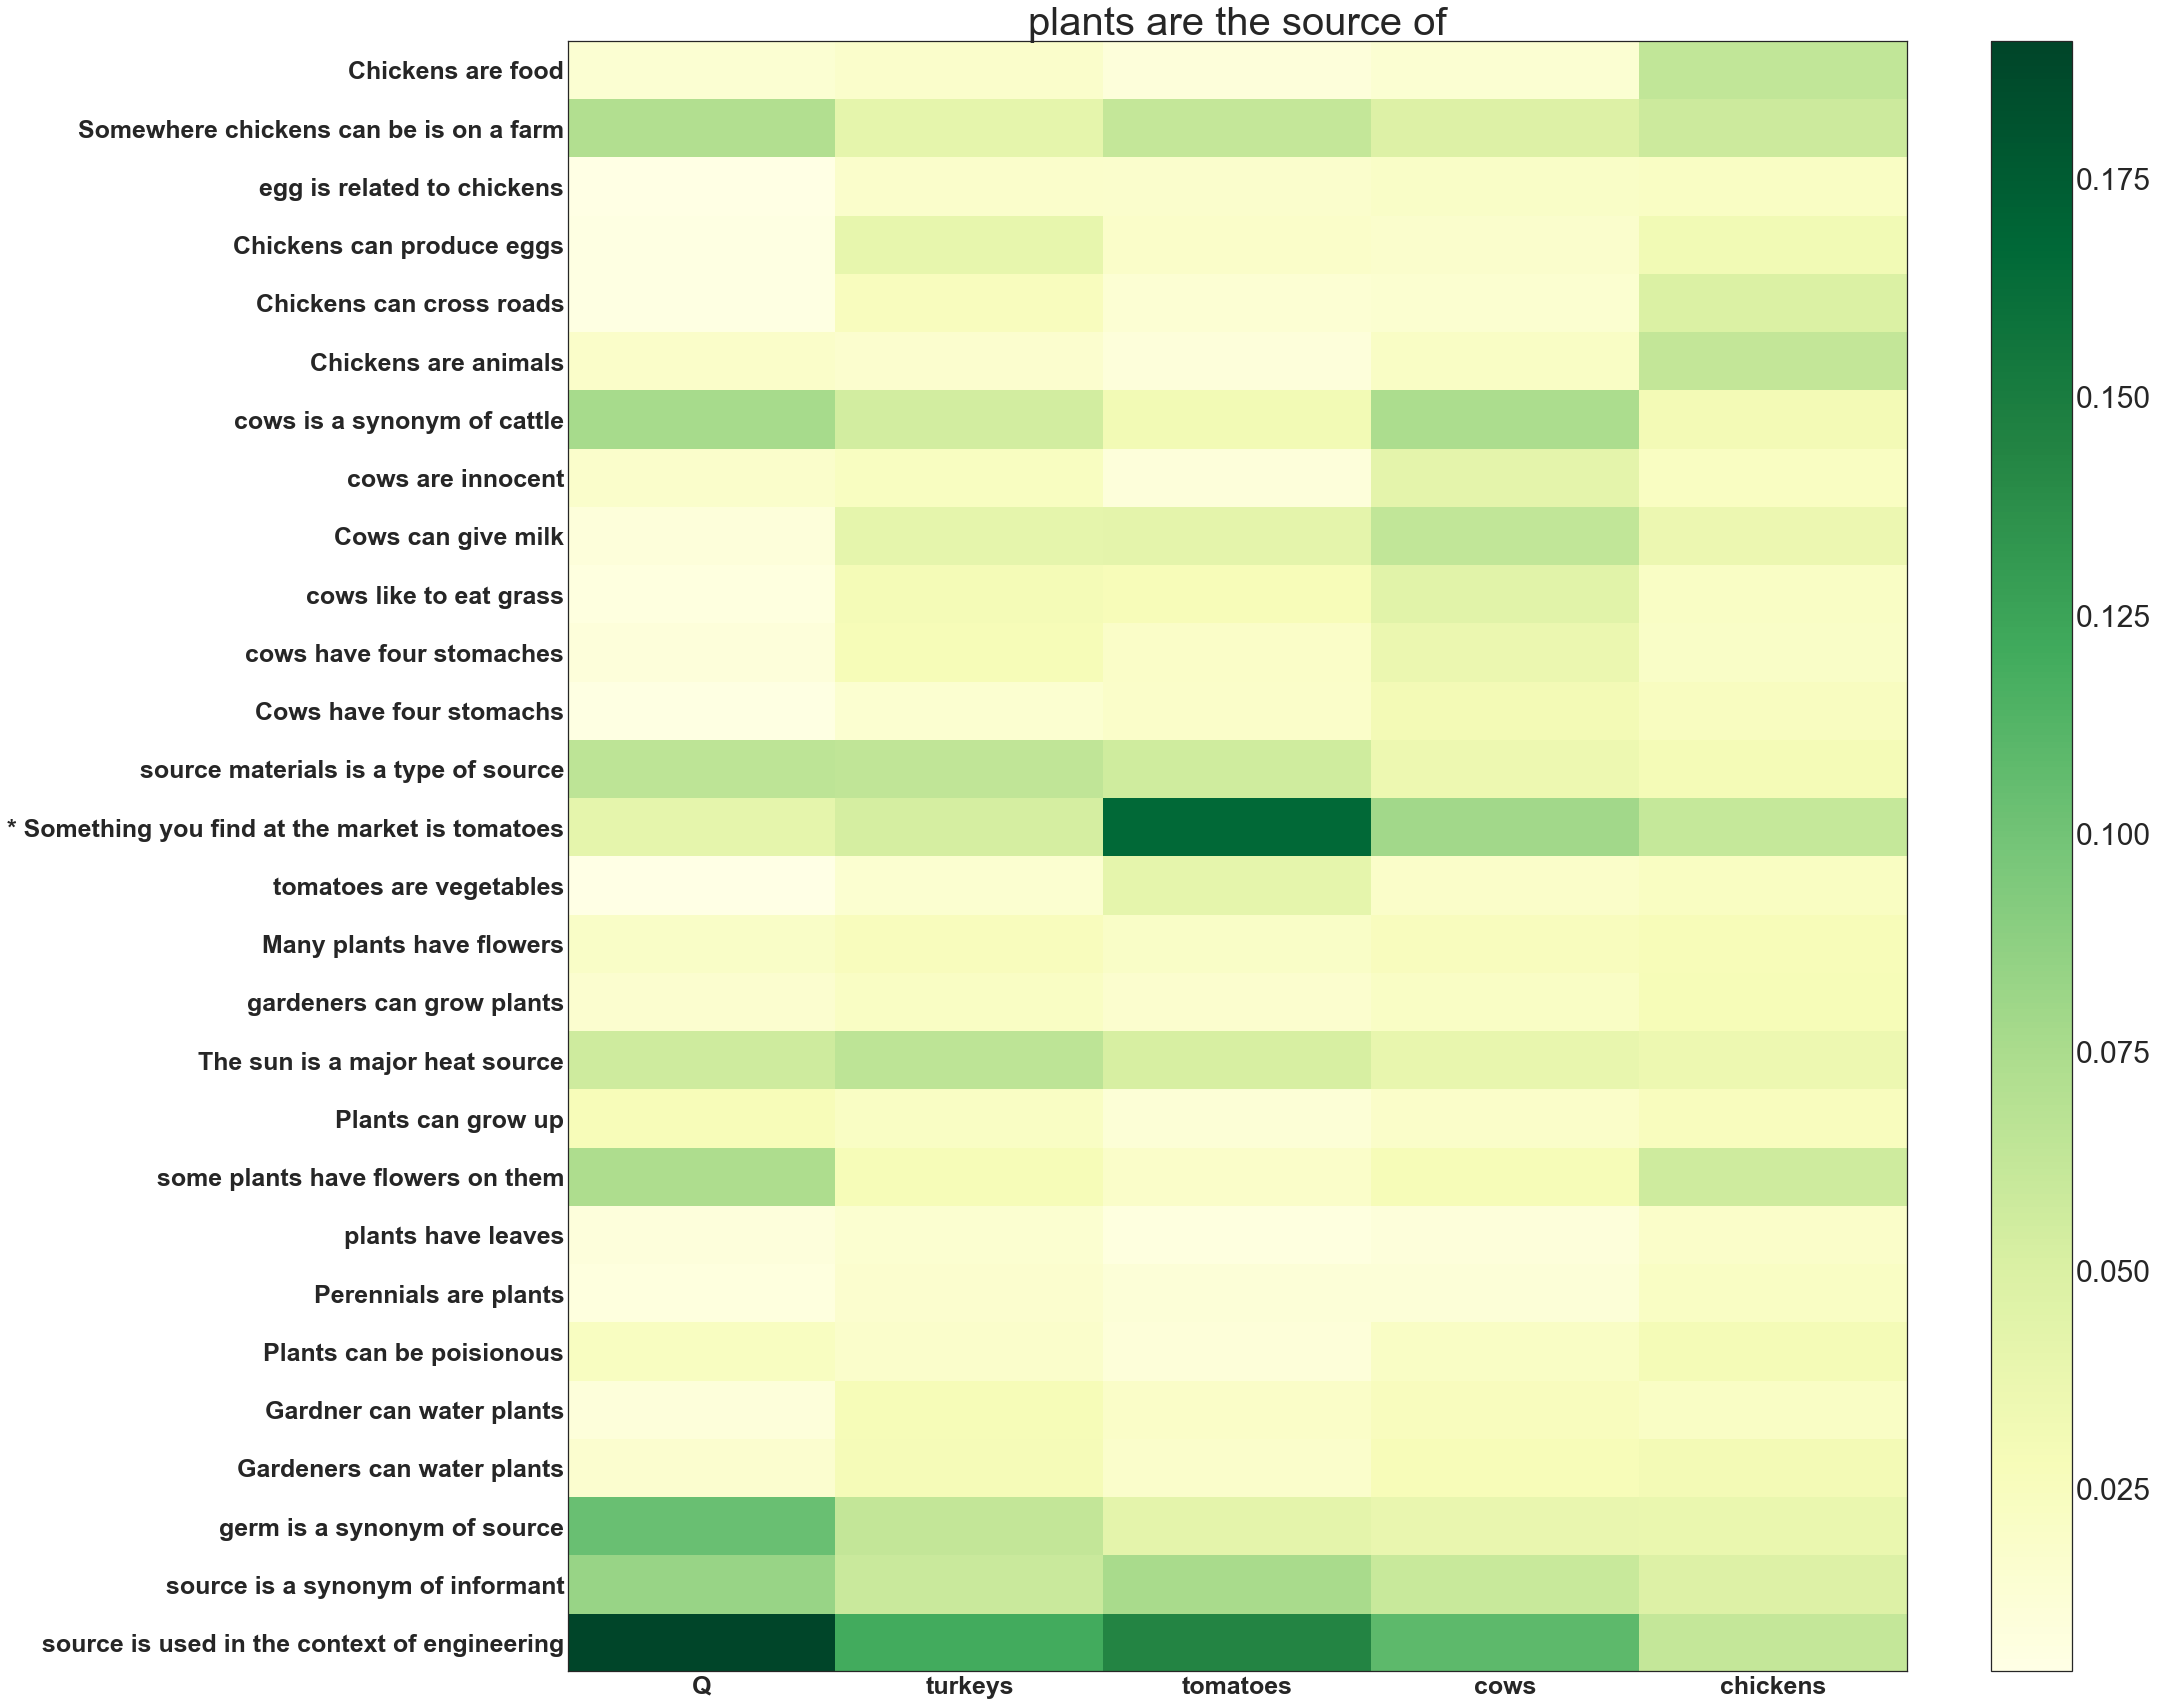

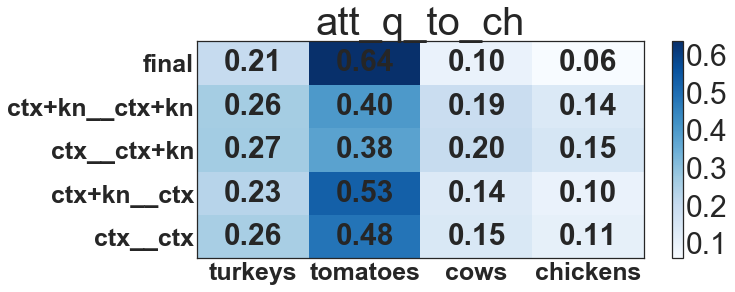

In [65]:
fig_path = "improvements.png"
n_models = 4, 
n_measures = 5

item_str_json = """
     {"id": "8-322", "question_tokens": ["@start@", "plants", "are", "the", "source", "of", "@end@"], "choice_tokens_list": [["@start@", "turkeys", "@end@"], ["@start@", "tomatoes", "@end@"], ["@start@", "cows", "@end@"], ["@start@", "chickens", "@end@"]], "facts_tokens_list": [["@start@", "source", "is", "used", "in", "the", "context", "of", "engineering", "@end@"], ["@start@", "source", "is", "a", "synonym", "of", "informant", "@end@"], ["@start@", "germ", "is", "a", "synonym", "of", "source", "@end@"], ["@start@", "Gardeners", "can", "water", "plants", "@end@"], ["@start@", "Gardner", "can", "water", "plants", "@end@"], ["@start@", "Plants", "can", "be", "poisionous", "@end@"], ["@start@", "Perennials", "are", "plants", "@end@"], ["@start@", "plants", "have", "leaves", "@end@"], ["@start@", "some", "plants", "have", "flowers", "on", "them", "@end@"], ["@start@", "Plants", "can", "grow", "up", "@end@"], ["@start@", "The", "sun", "is", "a", "major", "heat", "source", "@end@"], ["@start@", "gardeners", "can", "grow", "plants", "@end@"], ["@start@", "Many", "plants", "have", "flowers", "@end@"], ["@start@", "tomatoes", "are", "vegetables", "@end@"], ["@start@", "*", "Something", "you", "find", "at", "the", "market", "is", "tomatoes", "@end@"], ["@start@", "source", "materials", "is", "a", "type", "of", "source", "@end@"], ["@start@", "Cows", "have", "four", "stomachs", "@end@"], ["@start@", "cows", "have", "four", "stomaches", "@end@"], ["@start@", "cows", "like", "to", "eat", "grass", "@end@"], ["@start@", "Cows", "can", "give", "milk", "@end@"], ["@start@", "cows", "are", "innocent", "@end@"], ["@start@", "cows", "is", "a", "synonym", "of", "cattle", "@end@"], ["@start@", "Chickens", "are", "animals", "@end@"], ["@start@", "Chickens", "can", "cross", "roads", "@end@"], ["@start@", "Chickens", "can", "produce", "eggs", "@end@"], ["@start@", "egg", "is", "related", "to", "chickens", "@end@"], ["@start@", "Somewhere", "chickens", "can", "be", "is", "on", "a", "farm", "@end@"], ["@start@", "Chickens", "are", "food", "@end@"]], "gold_label": -1, "label_probs": [0.2055012583732605, 0.6365612149238586, 0.09861469268798828, 0.05932283774018288], "label_ranks": [1, 0, 2, 3], "predicted_label": 1, "attentions": {"att_q_to_ch": {"ctx__ctx": [0.25953608751296997, 0.48359882831573486, 0.14627358317375183, 0.11059151589870453], "ctx+kn__ctx": [0.2321593314409256, 0.529732346534729, 0.138922780752182, 0.09918556362390518], "ctx__ctx+kn": [0.26709333062171936, 0.3791462481021881, 0.19924896955490112, 0.15451142191886902], "ctx+kn__ctx+kn": [0.26383477449417114, 0.400874525308609, 0.19365565478801727, 0.14163506031036377], "final": [0.2055012583732605, 0.6365612149238586, 0.09861469268798828, 0.05932283774018288]}, "att_q_to_f": {"src1": [0.1907358318567276, 0.08291830867528915, 0.10324075073003769, 0.016183240339159966, 0.0102643221616745, 0.023155108094215393, 0.007833761163055897, 0.009174775332212448, 0.07384386658668518, 0.02801145799458027, 0.05718665197491646, 0.0162272397428751, 0.02014761231839657, 0.004024322144687176, 0.04146458953619003, 0.0655364990234375, 0.00579474214464426, 0.009902083314955235, 0.007561603561043739, 0.010476703755557537, 0.018240686506032944, 0.07636789232492447, 0.018934529274702072, 0.005875850562006235, 0.0061530242674052715, 0.004785997327417135, 0.07157302647829056, 0.014385548420250416, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}, "att_ch_to_f": {"src1": [[0.12027876079082489, 0.058811359107494354, 0.06305192410945892, 0.028886454179883003, 0.028586002066731453, 0.01819581538438797, 0.016876449808478355, 0.01557121891528368, 0.028129318729043007, 0.021810276433825493, 0.06575658172369003, 0.021900534629821777, 0.02572624757885933, 0.0151897594332695, 0.05335833132266998, 0.0640346109867096, 0.015293332748115063, 0.028749655932188034, 0.030113711953163147, 0.041908085346221924, 0.023271281272172928, 0.05460887402296066, 0.01703275553882122, 0.02475014142692089, 0.040403034538030624, 0.018413648009300232, 0.04134555160999298, 0.017946291714906693, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.14390286803245544, 0.0758148804306984, 0.04246845468878746, 0.01795663870871067, 0.019419126212596893, 0.01111682876944542, 0.011954412795603275, 0.007543980143964291, 0.019222872331738472, 0.012529103085398674, 0.05215553194284439, 0.016635779291391373, 0.020537998527288437, 0.041745975613594055, 0.16651445627212524, 0.0560583621263504, 0.019321320578455925, 0.019676608964800835, 0.0279363002628088, 0.04246452823281288, 0.010455217212438583, 0.03155023232102394, 0.010210349224507809, 0.013695407658815384, 0.019271735101938248, 0.01784457266330719, 0.06201968714594841, 0.009976780042052269, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.10885568708181381, 0.05959267169237137, 0.038313090801239014, 0.028071213513612747, 0.025131335482001305, 0.021066313609480858, 0.011900288052856922, 0.010171757079660892, 0.028524624183773994, 0.018967196345329285, 0.03966957703232765, 0.02142040617763996, 0.024590441957116127, 0.018765835091471672, 0.07878849655389786, 0.035903025418519974, 0.030773766338825226, 0.037079647183418274, 0.04481413960456848, 0.0634102150797844, 0.04216540604829788, 0.07475254684686661, 0.021455181762576103, 0.015395857393741608, 0.017180604860186577, 0.020493872463703156, 0.04819260537624359, 0.014554190449416637, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.06205006688833237, 0.048152144998311996, 0.03828353434801102, 0.03061622753739357, 0.021167315542697906, 0.029676642268896103, 0.021809285506606102, 0.019041819497942924, 0.05682273581624031, 0.024858077988028526, 0.03554883971810341, 0.028478480875492096, 0.027425384148955345, 0.022351179271936417, 0.06093646213412285, 0.029904892668128014, 0.023850740864872932, 0.02069571614265442, 0.021196866407990456, 0.03645182400941849, 0.02268996834754944, 0.030553573742508888, 0.06253738701343536, 0.049382664263248444, 0.03242471069097519, 0.02194303646683693, 0.05740874260663986, 0.06374166905879974, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}}}
     """

import json
item = json.loads(item_str_json.strip())

def get_ordered_key_values(typed_values, init_value_name="ctx__ctx", final_value_name = "full"):
    changes_names_keys = [x for x in typed_values.keys() if x not in [init_value_name, final_value_name]]
    ordered_keys = [init_value_name] + changes_names_keys + [final_value_name]

    key_values = [typed_values[k] for k in ordered_keys]

    key_values_array = np.asarray(key_values)

    return ordered_keys, key_values_array




import string

# keys to visualiza
choices_ids = [string.ascii_uppercase[x] for x in range(values_array.shape[1])]
choices_keys = [ " ".join([xx for xx in x if "@" not in xx]) for x in item["choice_tokens_list"]]
facts_keys = [ " ".join([xx for xx in x if "@" not in xx]) for x in item["facts_tokens_list"]]
question_text = " ".join([xx for xx in item["question_tokens"] if "@" not in xx]) 

# questions to facts
row_keys = facts_keys
#col_keys = [question_text] + choices_keys
col_keys = ["Q"] + choices_keys

attentions = np.asarray([item["attentions"]["att_q_to_f"]["src1"]] + item["attentions"]["att_ch_to_f"]["src1"]).transpose()
attentions = attentions[:len(facts_keys)]
print(attentions.shape)
visualize_mappings(attentions, y_labels=row_keys, x_labels=col_keys, title=question_text, fig_path="q_and_ch_to_f.png", show_values=False, color_scheme=plt.cm.YlGn, fig_height=30, fig_width=30)

# question to choices
row_keys, values_array = get_ordered_key_values(item["attentions"]["att_q_to_ch"], init_value_name="ctx__ctx", final_value_name = "final")
visualize_mappings(values_array, y_labels=row_keys, x_labels=choices_keys, title="att_q_to_ch", fig_path="improvements.png", color_scheme=plt.cm.Blues, fig_height=4, fig_width=10)





You will write differences of your models and another model in a text file (one row for one model) and read it as a numpy array.

## tSNE 

Using ```tSNE``` you can visualize your high-dimensional vectors in 2D space. Learn first how to use tSNE effectively https://distill.pub/2016/misread-tsne/.

In [15]:
def plot(candidates_tsne, n_classes, tags, ids, file_path):
    almost_black = '#262626'

    fig, ax = plt.subplots(1)
    # hard-coded for the example with 3 classes
    colors = ['red', 'blue']

    for k in range(n_classes):
        begin = sum(sizes[:k])
        end = sum(sizes[:k]) + sizes[k]
        x = [candidates_tsne[i, 0] for i in range(begin, end)]
        y = [candidates_tsne[i, 1] for i in range(begin, end)]

        # marks every vector with "id (tag)", where id and tag could be anything you like, e.g. word (POS)
        # every vector point is colored with the corresponding class color
        text = [str(ids[i]) + " (" + str(tags[i]) + ")" for i in range(begin, end)]
        ax.scatter(x, y, label='class'+str(k+1), alpha=0.5, edgecolor=almost_black, facecolor=colors[k], linewidth=0.15)

        for i, txt in enumerate(text):
            ax.annotate(txt, (x[i], y[i]))

    # remove top and right axes
    spines_to_remove = ['top', 'right']
    for spine in spines_to_remove:
        ax.spines[spine].set_visible(False)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    spines_to_keep = ['bottom', 'left']
    for spine in spines_to_keep:
        ax.spines[spine].set_linewidth(0.5)
        ax.spines[spine].set_color(almost_black)
        
    # make axis almost black
    ax.xaxis.label.set_color(almost_black)
    ax.yaxis.label.set_color(almost_black)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.title.set_color(almost_black)
    ax.set_title('tsne', fontsize = 20)

    # make the legend background light gray
    light_grey = np.array([float(248)/float(255)]*3)
    legend = ax.legend(frameon=True, scatterpoints=1)
    rect = legend.get_frame()
    rect.set_facecolor(light_grey)
    rect.set_linewidth(0.0)

    # change the legend label colors to almost black
    texts = legend.texts
    for t in texts:
        t.set_color(almost_black)

    ax.grid(False)
    plt.show()
    fig.savefig(str(file_path), dpi=200)
    plt.close()

Make random classification dataset.

In [16]:
import sklearn
from sklearn import datasets

n_classes = 2
X, y = datasets.make_classification(n_samples=10, n_features=20, class_sep=10)
types = [[] for _ in range(n_classes)]
sizes = [0]*n_classes
for i, l in enumerate(y):
    types[l].append(X[i])
    sizes[l] += 1

for i in range(n_classes):
    types[i] = np.asarray(types[i]).reshape((sizes[i], 20))

And plot.

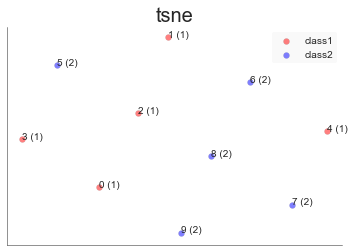

In [17]:
from sklearn.manifold import TSNE

joint = np.concatenate(types, 0)
tsne = TSNE(init='pca', n_iter=5000)
candidates_tsne = tsne.fit_transform(joint)
file_path = "figs/tsne.png"
tags = [1]*sizes[0] + [2]*sizes[1]
ids = range(sum(sizes))
plot(candidates_tsne, n_classes, tags, ids, file_path)

When running on serves comment ```plt.show``` for all examples.

## Stacked bars plot

In [18]:
#from matplotlib.font_manager import FontProperties
from operator import add

In [19]:
def tags_stacked_bars(distr1, distr2):
    distr1.sort(key=lambda item: item[1], reverse=True)
    distr1_dict = dict(distr1)

    distr2.sort(key=lambda item: item[1], reverse=True)
    distr2_dict = dict(distr2)
    
    # plot tags which has positive frequency in the first distribution and higher than one in the second
    plot_tags = [tag for tag, freq in distr1 if freq > 0.0]

    other = []
    for tag, freq in distr2:
        if freq > 1.0 and tag not in plot_tags:
            plot_tags.append(tag)
        else:
            other.append(freq)

    distr1_pruned_dict = {}
    for key in plot_tags:
        if key in distr1_dict:
            distr1_pruned_dict[key] = distr1_dict[key]
        else:
            distr1_pruned_dict[key] = 0

    distr2_pruned_dict = {}
    for key in plot_tags:
        if key in distr2_dict:
            distr2_pruned_dict[key] = distr2_dict[key]
        else:
            distr2_pruned_dict[key] = 0

    distr1_freq = []
    distr2_freq = []
    for tag in plot_tags:
        distr1_freq.append(distr1_pruned_dict[tag])
        distr2_freq.append(distr2_pruned_dict[tag])
    plot_tags.append("other")
    distr1_freq.append(0.0)
    distr2_freq.append(np.mean(np.asarray(other)))
    
    # plot stacked bar
    width = 0.4
    height_cumulative = [0.0, 0.0]
    plots = []
    ind = [0, 0.5]
    fig = plt.figure(figsize=(11, 11))
    ax = fig.add_subplot(1, 1, 1)

    colors = ['#0066ff', '#ffcc99', '#adebad', '#ff5c33', '#ac3973', '#ffbf00', '#7979d2', '#00cc99']

    for k in range(len(plot_tags)):
        if k < 8:
            color = colors[k]
        else:
            color = np.random.rand(3)
        if k == 0:
            plots.append(ax.bar(ind, [distr1_freq[k], distr2_freq[k]], width, color=color, edgecolor='black'))
        else:
            plots.append(ax.bar(ind, [distr1_freq[k], distr2_freq[k]], width,
                                bottom=height_cumulative, color=color, edgecolor='black'))
        height_cumulative = map(add, [distr1_freq[k], distr2_freq[k]], height_cumulative)

    plt.ylabel('median occurrence of a tag', fontsize=20)
    title = 'distribution of tags'
    plt.title(title, fontsize=25)
    plt.xticks([ind[0]+width/2.0, ind[1]+width/2], ["distr1", "distr2"], fontsize=20)
    plt.yticks(np.arange(0, sum(distr2_freq), 3))
    handles = [p[0] for p in plots]
    plt.legend(handles[::-1], plot_tags[::-1], prop={'size': 10}, loc='center left', bbox_to_anchor=(1, 0.5))
    fig_path = "figs/stacked_bars.png"
    plt.show()
    fig.savefig(fig_path)

TypeError: unsupported operand type(s) for +: 'map' and 'float'

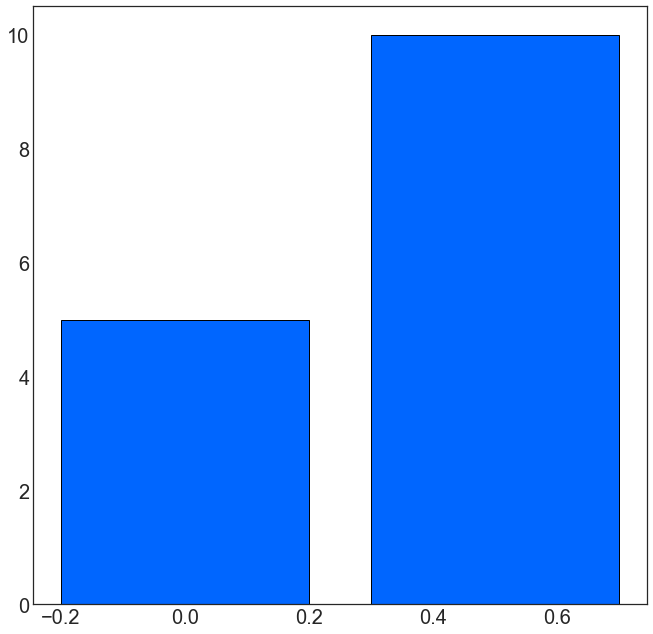

In [20]:
distr1 = [["NN", 5.0], ["NP", 3.0], ["PP", 2.0], ["ADV", 2.0], ["S", 2.0], ["ART", 2.0], ["$.", 1.0], ["KON", 1.0], ["ADJA", 1.0], ["APPR", 1.0], ["VVINF", 1.0], ["VVFIN", 1.0], ["$,", 1.0], ["KOUS", 1.0], ["VP", 1.0], ["VAFIN", 1.0], ["PPER", 1.0], ["CVZ", 0.0], ["AVP", 0.0], ["CAP", 0.0], ["CVP", 0.0], ["NE", 0.0], ["CPP", 0.0], ["VMFIN", 0.0], ["PTKNEG", 0.0], ["VAPP", 0.0], ["APPO", 0.0], ["PRF", 0.0], ["VVIZU", 0.0], ["NM", 0.0], ["PDAT", 0.0], ["PIAT", 0.0], ["ADJD", 0.0], ["$[", 0.0], ["PTKVZ", 0.0], ["PRELS", 0.0], ["PIS", 0.0], ["ROOT", 0.0], ["PROAV", 0.0], ["APZR", 0.0], ["PPOSAT", 0.0], ["CO", 0.0], ["CNP", 0.0], ["PDS", 0.0], ["VVPP", 0.0], ["AP", 0.0], ["XY", 0.0], ["PWAV", 0.0], ["CS", 0.0], ["PTKANT", 0.0], ["VZ", 0.0], ["PTKZU", 0.0], ["CARD", 0.0], ["PWS", 0.0], ["VMINF", 0.0], ["MPN", 0.0], ["VAINF", 0.0], ["APPRART", 0.0], ["KOKOM", 0.0], ["PTKA", 0.0], ["PIDAT", 0.0], ["TRUNC", 0.0], ["KOUI", 0.0], ["CAVP", 0.0]]
distr2 = [["NN", 10.0], ["NP", 7.0], ["S", 7.0], ["PP", 5.0], ["ADV", 4.0], ["ADJA", 3.0], ["APPR", 3.0], ["VP", 3.0], ["ART", 3.0], ["VVINF", 2.0], ["VVFIN", 2.0], ["VAFIN", 2.0], ["PPER", 2.0], ["KON", 1.0], ["VMFIN", 1.0], ["ADJD", 1.0], ["PTKNEG", 1.0], ["$.", 1.0], ["$,", 1.0], ["CNP", 1.0], ["KOUS", 1.0], ["PDS", 1.0], ["VVPP", 1.0], ["AP", 1.0], ["CS", 1.0], ["APPRART", 1.0], ["CVZ", 0.0], ["AVP", 0.0], ["CAP", 0.0], ["PWAT", 0.0], ["CVP", 0.0], ["NE", 0.0], ["CPP", 0.0], ["VAPP", 0.0], ["APPO", 0.0], ["PRF", 0.0], ["VVIZU", 0.0], ["NM", 0.0], ["PDAT", 0.0], ["PIAT", 0.0], ["FM", 0.0], ["$[", 0.0], ["PTKVZ", 0.0], ["PRELS", 0.0], ["PIS", 0.0], ["ROOT", 0.0], ["PROAV", 0.0], ["TRUNC", 0.0], ["PPOSAT", 0.0], ["CO", 0.0], ["XY", 0.0], ["PWAV", 0.0], ["PTKANT", 0.0], ["VZ", 0.0], ["PTKZU", 0.0], ["CARD", 0.0], ["PWS", 0.0], ["PRELAT", 0.0], ["VVIMP", 0.0], ["VMINF", 0.0], ["MPN", 0.0], ["VAINF", 0.0], ["KOKOM", 0.0], ["PTKA", 0.0], ["PIDAT", 0.0], ["APZR", 0.0], ["KOUI", 0.0], ["CAVP", 0.0]]

tags_stacked_bars(distr1, distr2)